/tmp/ipython-input-2261830218.py:25: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Dataset shape: (569, 33)
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

=== SVM Performance ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



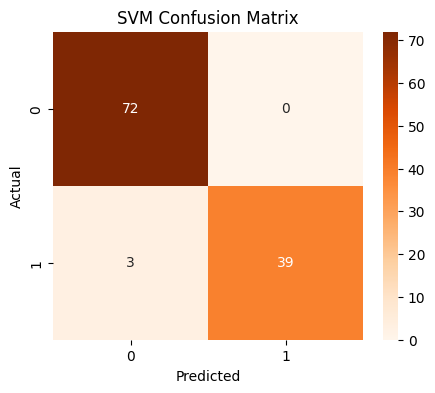

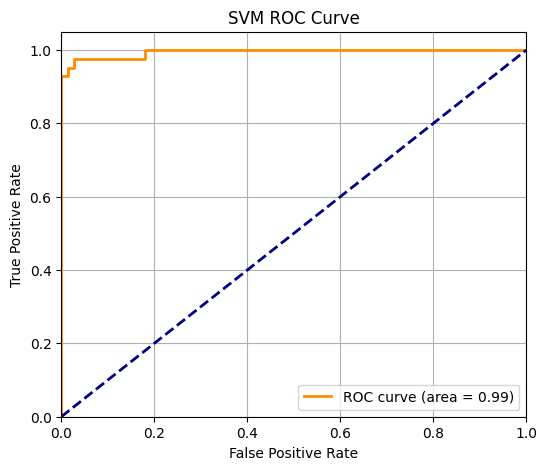

In [1]:
# =========================
# Support Vector Machine (SVM) Classification
# Breast Cancer Dataset (KaggleHub) with Hyperparameter Tuning
# =========================

!pip install kagglehub -q
!pip install scikit-learn -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# -------------------------
# Load Dataset
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv"
)

print("Dataset shape:", df.shape)
df.head()

# -------------------------
# Data Preprocessing
# -------------------------
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# Hyperparameter Tuning with GridSearchCV
# -------------------------
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svc = SVC(probability=True, random_state=42)

grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid.best_params_)

# -------------------------
# Train final model with best parameters
# -------------------------
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test_scaled)
y_prob = best_svc.predict_proba(X_test_scaled)[:, 1]

# -------------------------
# Performance Metrics
# -------------------------
print("\n=== SVM Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# -------------------------
# Confusion Matrix
# -------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# ROC Curve
# -------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
